In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/Users/ethanweber/.matplotlib/matplotlibrc", line #2
  (fname, cnt))
/usr/local/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/Users/ethanweber/.matplotlib/matplotlibrc", line #3
  (fname, cnt))
/usr/local/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/Users/ethanweber/.matplotlib/matplotlibrc", line #4
  (fname, cnt))
/usr/local/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/Users/ethanweber/.matplotlib/matplotlibrc", line #5
  (fname, cnt))
/usr/local/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/Users/ethanweber/.matplotlib/matplotlibrc", line #6
  (fname, cnt))


In [21]:
def get_cropped_polgon_region(image, corners):
    mask = np.zeros((len(image),len(image[0])), dtype=image.dtype) # height, width
    cv2.fillConvexPoly(mask, np.array(corners, np.int32), 255)
    mask = mask.astype(np.uint8)

    return self.get_masked_section(image, mask)

def get_masked_section(image, mask):
    output = image.copy()
    for i in range(len(image)):
        for j in range(len(image[0])):
            if mask[i][j] != 255:
                output[i][j] = 0
    return output

In [2]:
cap = cv2.VideoCapture(1)

In [3]:
ret = cap.set(3,960); # width
ret = cap.set(4,540); # height

In [22]:
ret, frame = cap.read()

In [23]:
frame.dtype

dtype('uint8')

In [5]:
background = cv2.imread("/Users/ethanweber/Documents/github_personal/smARtable/app/background/main_camera.png")

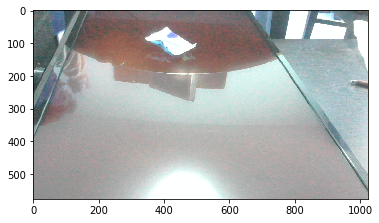

In [6]:
plt.imshow(frame)

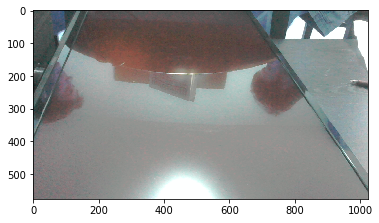

In [7]:
plt.imshow(background)

In [8]:
difference = np.absolute(np.subtract(frame, background))

In [9]:
# difference = cv2.cvtColor(difference, cv2.COLOR_BGR2GRAY)

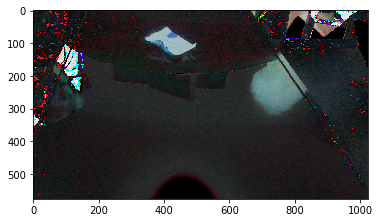

In [10]:
plt.imshow(difference, cmap='gray')

In [11]:
# filter the image
kernel = np.ones((35,35),np.uint8)
filtered = cv2.erode(difference,kernel,iterations=1)
kernel = np.ones((35,35),np.uint8)
filtered = cv2.dilate(filtered,kernel,iterations=1)

# convert to grayscale
filtered = cv2.cvtColor(filtered, cv2.COLOR_BGR2GRAY)

In [12]:
# set as 0 for this range
THRESH = 150
filtered = np.where(np.logical_and(0<=filtered, filtered<=THRESH), 0, filtered)
filtered = np.where(np.logical_and(THRESH<=filtered, filtered<=255), 255, filtered)

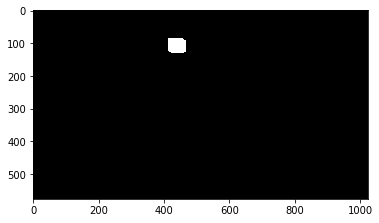

In [13]:
plt.imshow(filtered, cmap='gray')

In [14]:
im2, contours, hierarchy = cv2.findContours(filtered,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

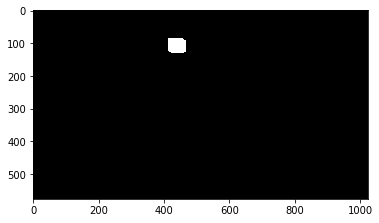

In [15]:
plt.imshow(im2, cmap='gray')

In [16]:
print(np.max(im2))

255


In [17]:
# final_image = cv2.cvtColor(im2, cv2.COLOR_GRAY2BGR)

In [18]:
best_density = 0.0
best_size = 0.0
best_contour = None
for contour in contours:
    # get the bounding rect
    x, y, w, h = cv2.boundingRect(contour)
    size = w*h
    # for size
    if size >= best_size:
            best_size = size
            best_contour = contour
#     if size > 100:
#         density = 0.0
#         count = 0.0
#         for i in range(y,y+h):
#             for j in range(x,x+w):
#                 count += im2[i][j] / 255.0
#         density = count / (w*h)
#         if density >= best_density:
#             best_density = density
#             best_contour = contour
        
if best_contour is not None:
    x, y, w, h = cv2.boundingRect(best_contour)
    expansion = 20
    # draw a green rectangle
    cv2.rectangle(frame, (x-expansion, y-expansion), (x+w+expansion, y+h+expansion), (0, 255, 0), 2)
    center = (x+w//2,y+h//2)
    radius = 5
    # and draw the circle in blue
    cv2.circle(frame, center, radius, (255, 0, 0), 10)
    
    

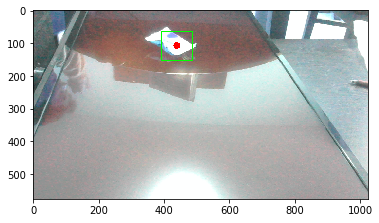

In [19]:
plt.imshow(frame)

In [20]:
# key is short, bright objects